# Holidays

## Adding default country holidays

https://github.com/dr-prodigy/python-holidays#available-countries




In [1]:
import pandas as pd 
import matplotlib.pyplot as plt
from prophet import Prophet

In [2]:
URL = 'https://raw.githubusercontent.com/PacktPublishing/Forecasting-Time-Series-Data-with-Facebook-Prophet/main/data/divvy_daily.csv'
df = pd.read_csv(URL)
df = df[['date', 'rides']]
df['date'] = pd.to_datetime(df['date'])
df.columns = ['ds', 'y']

In [17]:
model = Prophet(seasonality_mode='multiplicative', yearly_seasonality=4)

In [18]:
model.add_country_holidays(country_name='BRA')

In [19]:
model.fit(df)

INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


Initial log joint probability = -151.729


    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99       2727.33    0.00993535       157.183      0.4632           1      128   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     165       2727.98     0.0012296       243.489    1.49e-05       0.001      297  LS failed, Hessian reset 
     199       2728.22   1.56952e-05        74.523      0.4884      0.4884      341   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     284       2728.28   2.76415e-05       81.4517   3.763e-07       0.001      487  LS failed, Hessian reset 
     299       2728.28   7.50453e-07       66.3964           1           1      510   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     306       2728.28   2.17677e-07       73.0983     0.04454           1      520   
Optimization terminated normally: 
  Convergence detected: rel

In [20]:
future = model.make_future_dataframe(periods=365)
forecast = model.predict(future)

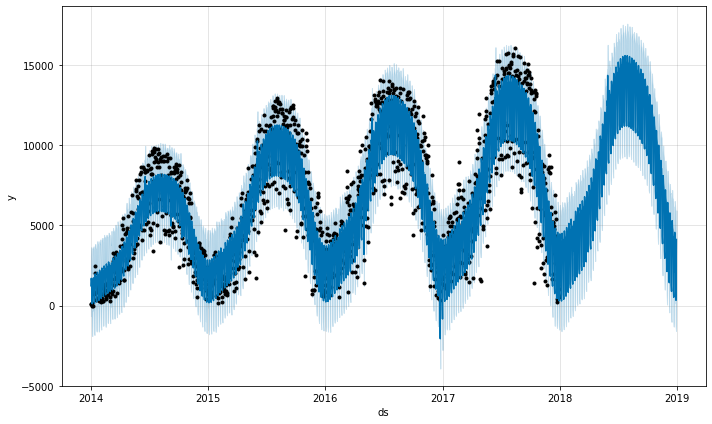

In [21]:
fig = model.plot(forecast)
plt.show()

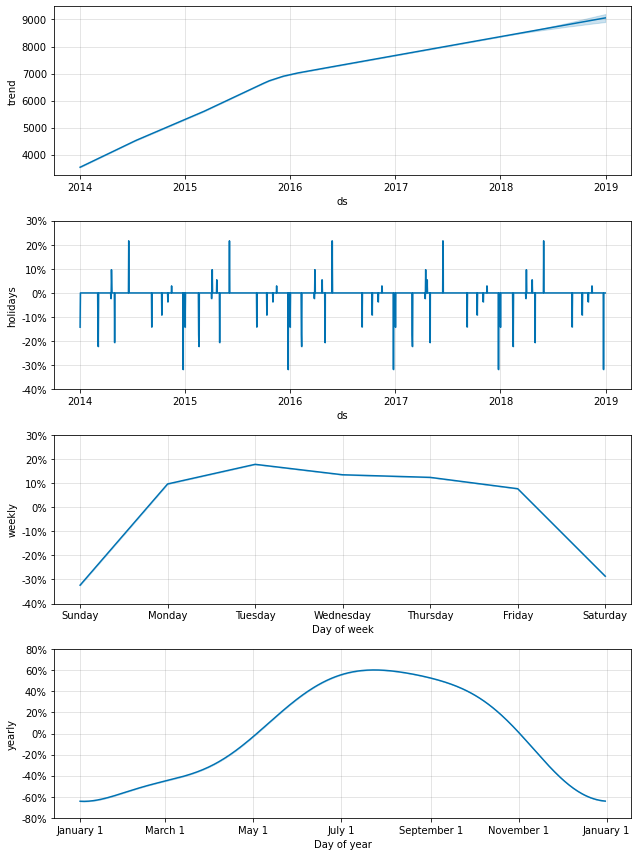

In [22]:
fig2 = model.plot_components(forecast)
plt.show()

In [23]:
model.train_holiday_names

0                                        Ano novo
1                                      Tiradentes
2                         Dia Mundial do Trabalho
3                         Independência do Brasil
4                         Nossa Senhora Aparecida
5                                         Finados
6                        Proclamação da República
7                                           Natal
8                               Sexta-feira Santa
9                                          Páscoa
10                                 Corpus Christi
11    Quarta-feira de cinzas (Início da Quaresma)
12                                       Carnaval
dtype: object

In [24]:
def first_non_zero(fcst, holiday):
    return fcst[fcst[holiday] != 0][holiday].values[0]
    
pd.DataFrame({'holiday': model.train_holiday_names,
              'effect': [first_non_zero(forecast, holiday)
                         for holiday in \
                         model.train_holiday_names]})

,holiday,effect
0,Ano novo,-0.142439
1,Tiradentes,0.054473
2,Dia Mundial do Trabalho,-0.206239
3,Independência do Brasil,-0.141854
4,Nossa Senhora Aparecida,-0.092109
5,Finados,-0.037619
6,Proclamação da República,0.029148
7,Natal,-0.318228
8,Sexta-feira Santa,-0.023440
9,Páscoa,0.096602


# Adding default state/province holidays

In [27]:
from prophet.make_holidays import make_holidays_df

In [29]:
year_list = df['ds'].dt.year.unique().tolist()
year_list

[2014, 2015, 2016, 2017]

In [30]:
# Identify the final year, as an integer, and increase it by 1
year_list.append(year_list[-1] + 1)
year_list

[2014, 2015, 2016, 2017, 2018]

In [49]:
holidays = make_holidays_df(
    year_list=year_list,
    country='BRA',
    state='SP'
)

In [50]:
holidays.head()

,ds,holiday
0,2016-01-01,Ano novo
1,2016-04-21,Tiradentes
2,2016-05-01,Dia Mundial do Trabalho
3,2016-09-07,Independência do Brasil
4,2016-10-12,Nossa Senhora Aparecida


In [51]:
model = Prophet(
    seasonality_mode='multiplicative',
    yearly_seasonality=4,
    holidays=holidays
)

In [52]:
model.fit(df)

INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


Initial log joint probability = -151.729


    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99       2727.18     0.0030769       140.579           1           1      125   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     199       2728.38    0.00339977        88.611           1           1      263   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     207       2728.49   0.000451714       172.086   4.237e-06       0.001      308  LS failed, Hessian reset 
     299       2728.65   6.56391e-06       70.8219      0.4072           1      422   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     333       2728.66   3.11834e-07       64.3626      0.2574      0.2574      462   
Optimization terminated normally: 
  Convergence detected: relative gradient magnitude is below tolerance


In [53]:
future = model.make_future_dataframe(periods=365)
forecast = model.predict(future)

In [54]:
model.train_holiday_names

0                                        Ano novo
1                                      Tiradentes
2                         Dia Mundial do Trabalho
3                         Independência do Brasil
4                         Nossa Senhora Aparecida
5                                         Finados
6                        Proclamação da República
7                                           Natal
8                               Sexta-feira Santa
9                                          Páscoa
10                                 Corpus Christi
11    Quarta-feira de cinzas (Início da Quaresma)
12                                       Carnaval
13           Revolução Constitucionalista de 1932
dtype: object

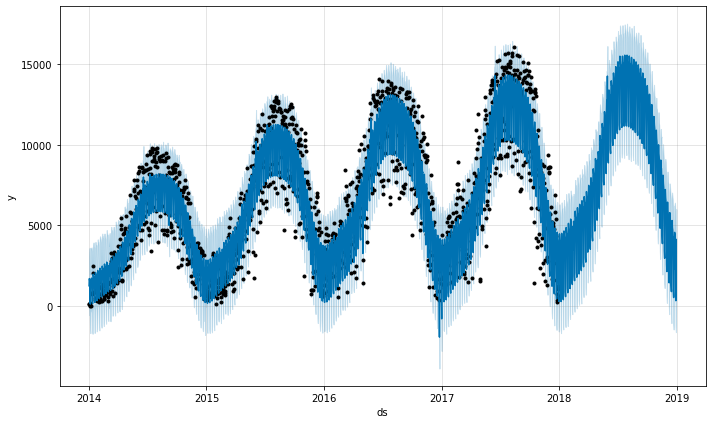

In [55]:
fig = model.plot(forecast)
plt.show()

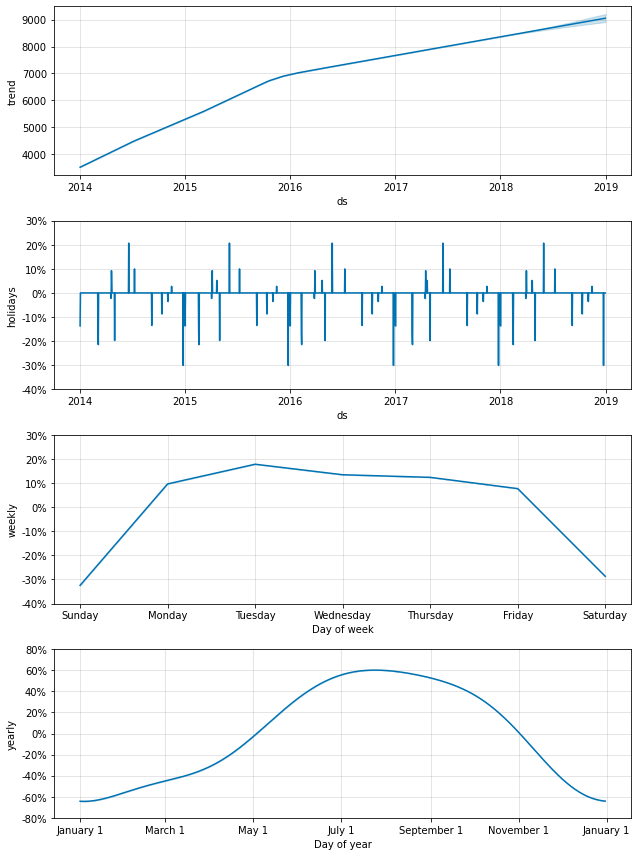

In [56]:
fig2 = model.plot_components(forecast)
plt.show()

In [57]:
def first_non_zero(fcst, holiday):
    return fcst[fcst[holiday] != 0][holiday].values[0]
    
pd.DataFrame({'holiday': model.train_holiday_names,
              'effect': [first_non_zero(forecast, holiday)
                         for holiday in \
                         model.train_holiday_names]})

,holiday,effect
0,Ano novo,-0.137098
1,Tiradentes,0.051998
2,Dia Mundial do Trabalho,-0.197548
3,Independência do Brasil,-0.135113
4,Nossa Senhora Aparecida,-0.087025
5,Finados,-0.035480
6,Proclamação da República,0.027442
7,Natal,-0.300850
8,Sexta-feira Santa,-0.022756
9,Páscoa,0.092218


### Regularizing holidays

The process of constraining a model's flexibility to help it generalize better to new data 
is called **regularization**.

### Global holiday regularization

In [65]:
model = Prophet(
    seasonality_mode='multiplicative',
    yearly_seasonality=4,
    holidays_prior_scale=10
)

In [66]:
model.add_country_holidays(country_name='BRA')
model.fit(df)

INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


Initial log joint probability = -151.729


    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99       2727.33    0.00993535       157.183      0.4632           1      128   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     165       2727.98     0.0012296       243.489    1.49e-05       0.001      297  LS failed, Hessian reset 
     199       2728.22   1.56952e-05        74.523      0.4884      0.4884      341   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     284       2728.28   2.76415e-05       81.4517   3.763e-07       0.001      487  LS failed, Hessian reset 
     299       2728.28   7.50453e-07       66.3964           1           1      510   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     306       2728.28   2.17677e-07       73.0983     0.04454           1      520   
Optimization terminated normally: 
  Convergence detected: rel

In [67]:
future = model.make_future_dataframe(periods=365)
forecast = model.predict(future)

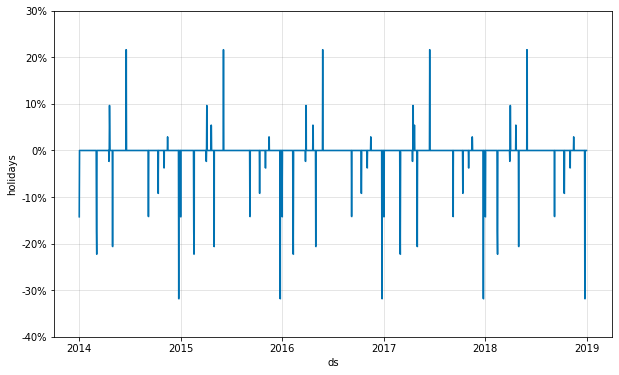

In [68]:
from prophet.plot import plot_forecast_component

fig = plot_forecast_component(model, forecast, 'holidays')
plt.show()

In [69]:
model = Prophet(
    seasonality_mode='multiplicative',
    yearly_seasonality=4,
    holidays_prior_scale=0.05
)

In [70]:
model.add_country_holidays(country_name='BRA')
model.fit(df)

INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


Initial log joint probability = -151.729


    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      72        2715.3   0.000471957       123.567   1.606e-06       0.001      137  LS failed, Hessian reset 
      99       2716.62   0.000971004       72.9396      0.7476      0.7476      167   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     123       2717.54   0.000524969       185.498   3.433e-06       0.001      231  LS failed, Hessian reset 
     177       2718.23   0.000115543       79.7207   1.159e-06       0.001      340  LS failed, Hessian reset 
     199       2718.24    3.6142e-07        78.688      0.7489      0.7489      371   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     207       2718.24    1.4022e-07       72.4283      0.2626           1      383   
Optimization terminated normally: 
  Convergence detected: relative gradient magnitude is below tolerance


In [71]:
future = model.make_future_dataframe(periods=365)
forecast = model.predict(future)

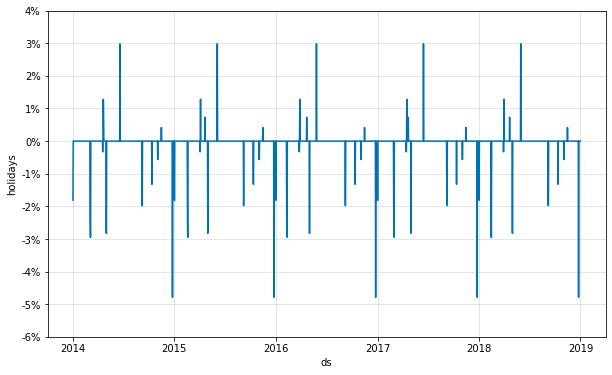

In [72]:
fig = plot_forecast_component(model, forecast, 'holidays')
plt.show()

When regularized, the plot appears similar to the plot of unregularized holidays, but with 
a few differences:

- First, we see the scale has changed a lot.

- The second thing to notice is that all holidays haven't been 
reduced by an equal proportion.


Choosing a value for the prior scale can be more art than science. You may use your 
domain knowledge to adjust the value if the holidays' effect seems stronger or weaker 
than your intuition suggests. If in doubt, experiment and see what works best. The most 
rigorous approach would be to use grid search with cross-validation.

### Individual holiday regularization

In [73]:
holidays = make_holidays_df(year_list=year_list, country='BRA')

In [74]:
black_friday = pd.DataFrame({
    'holiday': 'Black Friday',
    'ds': pd.to_datetime(
        [
            '2014-11-28',
            '2015-11-27',
            '2016-11-25',
            '2017-11-24',
            '2018-11-23'
        ]
    ),
    'prior_scale': 1
})

In [75]:
christmas_eve = pd.DataFrame({
    'holiday': 'Christmas Eve',
    'ds': pd.to_datetime(
        [
            '2014-12-24',
            '2015-12-24',
            '2016-12-24',
            '2017-12-24',
            '2018-12-24'
        ]
    ),
    'prior_scale': 1
})

In [76]:
taste_of_chicago = \
pd.DataFrame({'holiday': 'Taste of Chicago',
              'ds': pd.to_datetime(['2014-07-09',
                                    '2015-07-08',
                                    '2016-07-06',
                                    '2017-07-05',
                                    '2018-07-11']),
              'lower_window': 0,
              'upper_window': 4,
              'prior_scale': 0.1})

In [77]:
holidays = pd.concat([holidays,
                      black_friday,
                      christmas_eve,
                      taste_of_chicago]
                    ).sort_values('ds')\
                     .reset_index(drop=True)

In [78]:
holidays.head(16)

,ds,holiday,prior_scale,lower_window,upper_window
0,2014-01-01,Ano novo,NaN,NaN,NaN
1,2014-03-04,Carnaval,NaN,NaN,NaN
2,2014-03-05,Quarta-feira de cinzas (Início da Quaresma),NaN,NaN,NaN
3,2014-04-18,Sexta-feira Santa,NaN,NaN,NaN
4,2014-04-20,Páscoa,NaN,NaN,NaN
5,2014-04-21,Tiradentes,NaN,NaN,NaN
6,2014-05-01,Dia Mundial do Trabalho,NaN,NaN,NaN
7,2014-06-19,Corpus Christi,NaN,NaN,NaN
8,2014-07-09,Taste of Chicago,0.1,0.0,4.0
9,2014-09-07,Independência do Brasil,NaN,NaN,NaN


In [79]:
model = Prophet(seasonality_mode='multiplicative',
                yearly_seasonality=4,
                holidays=holidays,
                holidays_prior_scale=10)
model.fit(df)

INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


Initial log joint probability = -151.729


    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99       2736.85    0.00365657       117.406           1           1      119   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     170       2737.84   0.000288633       77.5487   3.663e-06       0.001      257  LS failed, Hessian reset 
     199       2737.86   2.20302e-06       64.7114      0.7992      0.7992      293   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     253       2737.95   0.000247144       77.9273   2.683e-06       0.001      399  LS failed, Hessian reset 
     299       2737.99   2.14393e-05       73.5295      0.6657      0.6657      456   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     324       2737.99   7.25197e-08       67.9771      0.2416           1      496   
Optimization terminated normally: 
  Convergence detected: rel

In [80]:
future = model.make_future_dataframe(periods=365)
forecast = model.predict(future)

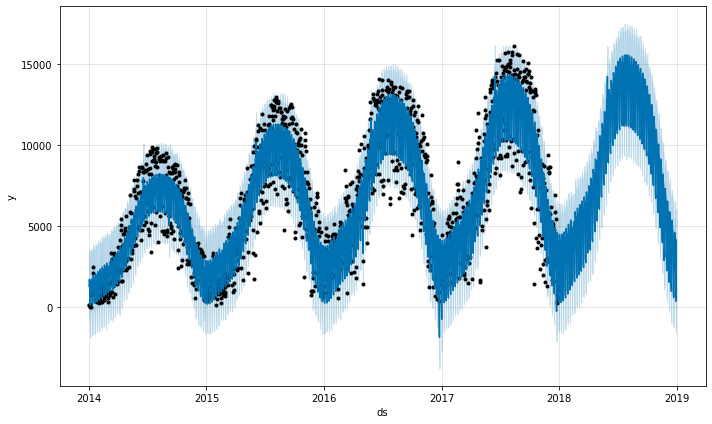

In [81]:
fig = model.plot(forecast)
plt.show()

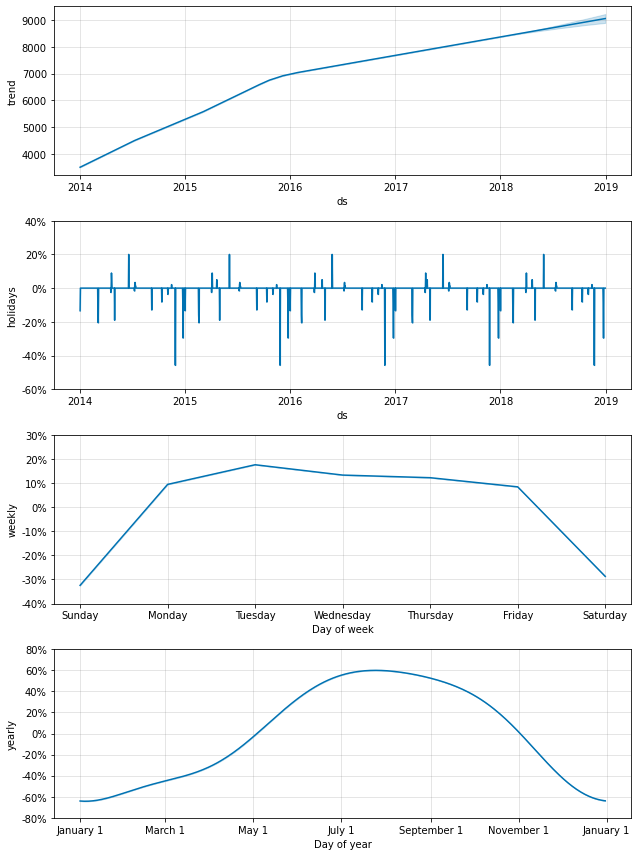

In [82]:
fig2 = model.plot_components(forecast)
plt.show()